<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Abdallah Ragab 

GUC-ID: 43-14849

Elective Tutorial No.: T-02

**Member 2**

Name: Omar Hany

GUC-ID: 43-5802

Elective Tutorial No.: T-04

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [2]:
# return (x_train, y_train), (x_test, y_test)

def read_data():
    x_train = []
    y_train = []

    x_train_airplane = np.array([plt.imread('Data/Train/airplane/'+str(i)+'.jpg') for i in range (0,5000)])
    x_train_automobile = np.array([plt.imread('Data/Train/automobile/'+str(i)+'.jpg') for i in range (0,5000)])
    x_train_frog = np.array([plt.imread('Data/Train/frog/'+str(i)+'.jpg') for i in range (0,5000)])
    
    
    x_train = x_train_airplane
    x_train = np.append(x_train,x_train_automobile,axis=0)
    x_train = np.append(x_train,x_train_frog,axis = 0)
    
    for i in range(0,3):
        for j in range(0,5000):
            y_train.append(i)
            
    

    x_test = []
    y_test = []
    x_test_airplane = np.array([plt.imread('Data/Test/airplane/'+str(i)+'.jpg') for i in range (0,1000)])
    x_test_automobile = np.array([plt.imread('Data/Test/automobile/'+str(i)+'.jpg') for i in range (0,1000)])
    x_test_frog = np.array([plt.imread('Data/Test/frog/'+str(i)+'.jpg') for i in range (0,1000)])
    
    
    x_test = x_test_airplane
    x_test = np.append(x_test,x_test_automobile,axis = 0)
    x_test = np.append(x_test,x_test_frog,axis = 0)
    
    
    for i in range(0,3):
        for j in range(0,1000):
            y_test.append(i)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    #normalize rgb
    x_train = x_train/255
    x_test = x_test/255
    return (x_train, y_train), (x_test, y_test)
(x_train,y_train),(X_test,y_test)=read_data()


##################################################

x_train = np.reshape(x_train, (len(x_train),1024,3)) 
X_test = np.reshape(X_test, (len(X_test),1024,3)) 

x_train_rgb = np.reshape(x_train,(len(x_train),3072))
x_test_rgb = np.reshape(X_test,(len(X_test),3072))


R, G, B = x_train[0:][:,:,0], x_train[0:][:,:,1], x_train[0:][:,:,2]
x_train_grayScale = 0.3 * R + 0.59 * G + 0.11 * B

R, G, B = X_test[0:][:,:,0], X_test[0:][:,:,1], X_test[0:][:,:,2]
x_test_grayScale = 0.3 * R + 0.59 * G + 0.11 * B



# Helpers

In [3]:
def compute_confusion_matrix(expected, pred):
  K = len(np.unique(expected)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(expected)):
    result[expected[i]][pred[i]] += 1

  return result
            

In [4]:
def calc(w,w0,x):
    return w.dot(x) + w0

In [5]:
def fisher(x_train,y_train,label):
    x_train_label= [x_train[i] for i in range(len(x_train)) if y_train[i]==label]
    x_train_not_label= [x_train[i] for i in range(len(x_train)) if y_train[i]!=label]
    
    x_train_label=np.asarray(x_train_label)
    x_train_not_label=np.asarray(x_train_not_label)

    m_label = np.transpose([np.mean(x_train_label, axis=0)])
    m_not_label = np.transpose([np.mean(x_train_not_label, axis=0)])
               

    sw_label_broadcasted=x_train_label - np.transpose(m_label)
    sw_label= np.transpose(sw_label_broadcasted).dot(sw_label_broadcasted)
    
    sw_not_label_broadcasted=x_train_not_label - np.transpose(m_not_label)
    sw_not_label= np.transpose(sw_not_label_broadcasted).dot(sw_not_label_broadcasted)
    # the equation has the same idea of the (Xtelda)T * (Xtelda) in least squares, we grouped datapoints and applied the same operation on them
    # to optimize the runtime
    
    sw=sw_label+sw_not_label
    
    sw_inv = np.linalg.pinv(sw)
    
    m_diff=m_label-m_not_label #m2-m1
    
    multiplier=10000 # the 10000 makes the values have a good range
    w = multiplier*sw_inv.dot(m_diff)
    m_avg=(m_label+m_not_label)/2
    w0=-np.transpose(w).dot(m_avg)
    w0=w0[0][0]
    return w,w0

In [6]:
def correctness(x_test):#rgb or grayscale
    correct=0
    predicted = []
    for i in range(len(x_test)):
        img1=x_test[i]
        img1=np.transpose([img1])
        y_airplane=calc(np.transpose(w_airplane),w0_airplane,img1)[0][0]
        y_automobile=calc(np.transpose(w_automobile),w0_automobile,img1)[0][0]
        y_frog=calc(np.transpose(w_frog),w0_frog,img1)[0][0]
        label=0
        if(y_automobile>y_airplane and y_automobile>y_frog):
            label=1
        elif (y_frog>y_airplane and y_frog>y_automobile):
            label=2
        predicted.append(label)
        if label==y_test[i]:
            correct+=1
            
                    
    print(correct*100/len(x_test))
    return predicted

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [7]:
# Write code here
# Train
# Test
# confusion_matrix = 

In [7]:
w_airplane,w0_airplane=fisher(x_train_rgb,y_train,0)

print(w_airplane)
print(w0_airplane)

[[-6.79449815]
 [ 5.78502101]
 [ 1.63667148]
 ...
 [ 1.71044303]
 [-2.88098688]
 [ 0.34343042]]
-3.124374951448548


In [8]:
w_automobile,w0_automobile=fisher(x_train_rgb,y_train,1)

print(w_automobile)
print(w0_automobile)

[[ 8.90187507]
 [-6.07141786]
 [-3.029459  ]
 ...
 [-0.61904042]
 [ 1.78434893]
 [-0.71908975]]
-0.19338736859783978


In [9]:
w_frog,w0_frog=fisher(x_train_rgb,y_train,2)
print(w_frog)
print(w0_frog)

[[-3.20080667]
 [ 0.86221523]
 [ 1.86465999]
 ...
 [-1.19815903]
 [ 1.10176526]
 [ 0.49431908]]
1.5831207697599154


In [10]:
predicted = correctness(x_test_rgb)

73.4


In [11]:
confusion_matrix = compute_confusion_matrix(y_test,predicted)

In [12]:
confusion_matrix

array([[760., 144.,  96.],
       [201., 654., 145.],
       [ 78., 134., 788.]])

## Confusion Matrix (Don't Edit)

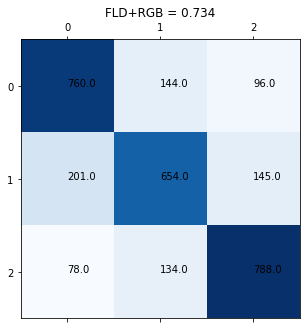

In [13]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [ ]:
# Write code here
# Train
# Test
# confusion_matrix = 

In [14]:
w_airplane,w0_airplane=fisher(x_train_grayScale,y_train,0)
w_automobile,w0_automobile=fisher(x_train_grayScale,y_train,1)
w_frog,w0_frog=fisher(x_train_grayScale,y_train,2)


In [15]:
predicted = correctness(x_test_grayScale)

60.06666666666667


In [16]:
confusion_matrix = compute_confusion_matrix(y_test,predicted)

## Confusion Matrix (Don't Edit)

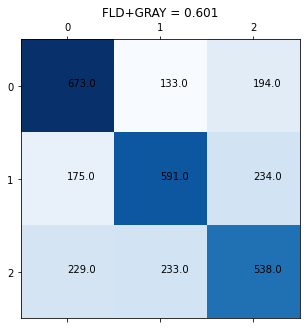

In [17]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

The accuracy of the rgb is higher than that of grayscale, due to taking more dimensions in account. RGB contain more info about the picture so it gives a better estimate when trained. 

Note: slightly different accuracies were observed when the code runs on local vs colab, due to differences in precision in both engines

##########
<hr style="border:2px solid black"> </hr>